<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Firstmidterm2022.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# Midterm 1 (Due 23 Feb)

Date: **12 Feb 24**

## Introduction to the first midterm project, total score 100 points

The relevant reading background is:

1. chapters 2-5 of Taylor.
2. chapters 6-14 of Malthe-Sørenssen.

In this midterm project we will start with a potential. There are some elements
of that exercise which are repeated here, similarly, a good fraction
of the codes you have developed for homeworks can be used here.
We start with a one-dimensional potential and motion.  Thereafter we
extend this potential model for quarks and study the
numerical solution of the corresponding problem.

### Practicalities about midterm projects

You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group, you **must** hand in your own work. **Remember to write your name(s)** and indicate how each person contributed.

Midterms might cover topics from prior homework, lectures, and readings. It is likely that some of the problems might require a little research on your own or might be slightly beyond what we have done on class and in homework. The midterm is meant to be challenging, but it should also be a good place to learn more about the topics covered in the course. We encourage you to use the textbook, notes, and other resources when solving the midterm. Of course, you can also work with others on the midterm, but make sure you write up the solutions yourself. You can ask the any of the teaching staff for help.

### Part 1, Particle in a one-dimensional  potential

We consider a particle (for example an atom) of mass $m$ moving in a one-dimensional potential,

$$
V(x)=\frac{V_0}{d^4}\left(x^4-2x^2d^2+d^4\right).
$$

We will assume all other forces on the particle are small in comparison, and neglect them in our model.  The parameters $V_0$ and $d$ are known constants. 

1. (5pt) Plot the potential and find the  equilibrium points (stable and unstable) by requiring that the first derivative of the potential is zero. Make an energy diagram (see for example Malthe-Sørenssen chapter 11.3) and mark the equilibrium points on the diagram and characterize their stability. The position of the particle is $x$. 

<div style="background-color:PaleGreen;color:black;padding:2%;">

$$
\frac{d}{dx}V(x) = \frac{V_0}{d^4} (4x^3 - 4xd^2) \\
0  = \frac{V_0}{d^4} (4x^3 - 4xd^2) \implies x^3 = xd^2 \\ x = 0, \pm d \\
V(0) = V_0 \\
V(\pm d) = 0
$$

Stable at $\pm d$ <br>
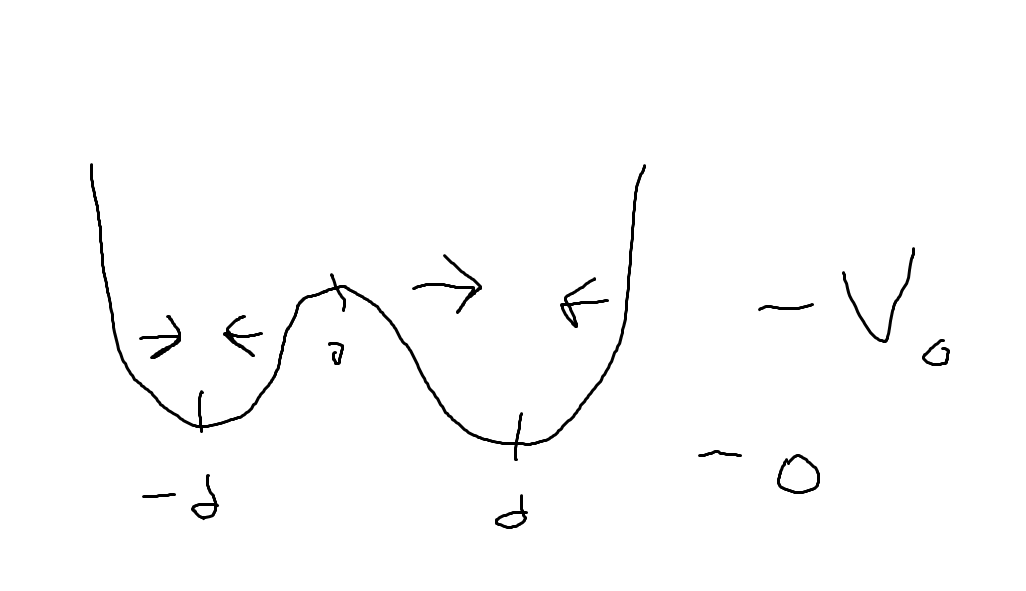

</div>


2. (5pt) Choose two different energies that give two distinct types of motions, draw them on the energy diagram, and describe the motion in each case.

<div style="background-color:PaleGreen;color:black;padding:2%;">

a) $ E<V_0 $

Particle moves across nearest stable point, but does not pass the unstable equilibrium at x=0 or the opposite potential wall. Highest kinetic energy at stable equilibrium point

b) $E>V_0$

Particle moves across the stable equilibrium point but is still bound and turns around at either side of potential well. Highest kinetic energy is at either equilibrium point

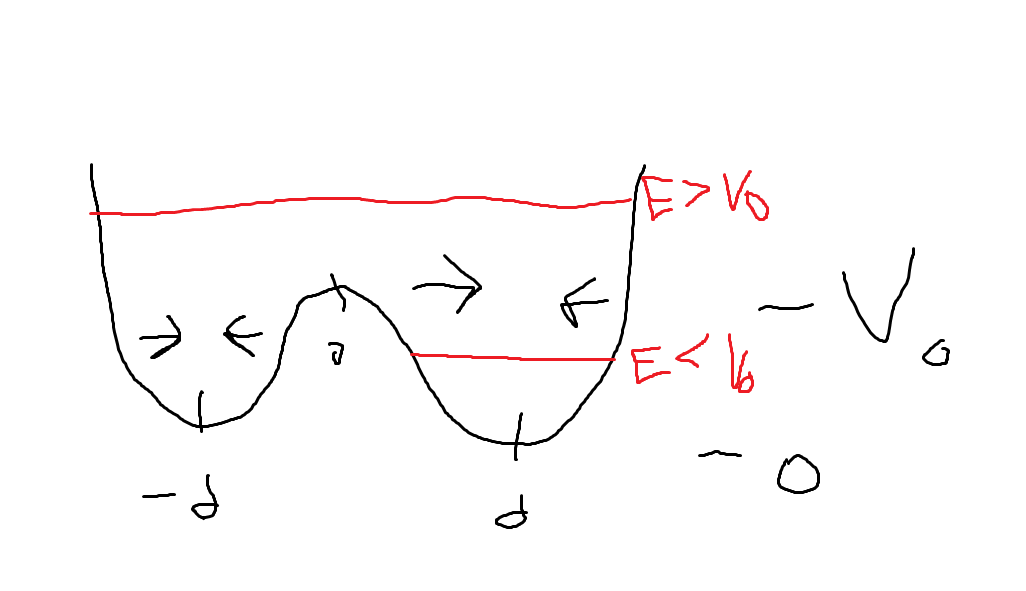

</div>


3. (5pt) If the particle  starts at rest at $x=2d$, what is the velocity of the particle at the point $x=d$?

<div style="background-color:PaleGreen;color:black;padding:2%;">

At $x=d$ potential is zero so $KE(x=d) = V(x=2d)$

$$V(2d) = V_0(2^4-2*2^2+1) = 9V_0 \\ 9V_0 = 1/2 m v^2 \\ v = \pm \sqrt{\frac{18V_0}{m}}$$

</div>

4. (5pt) If the particle  starts at $x=d$ with velocity $v_0$, how large must $v_0$ be for the  particle to reach the point $x=−d$?

<div style="background-color:PaleGreen;color:black;padding:2%;">

Total energy must be greater than the highest potential between $-d$ and $d$, which is at $x =0,\ V(0) = V_0$. Again, potential at $x=d$ is zero, so it's all on the kinetic energy to get past the hump

$$
KE(d) > V(0) \\ 
1/2 m v_0^2 > V_0 \implies v_0 = \pm \sqrt{\frac{2V_0}{m}}
$$

</div>

5. (5pt) Use the above potential to find the net force acting on the particle.  Find the acceleration acting on the particle. Is this net force conservative? Calculate the **curl** of the force  $\boldsymbol{\nabla}\times \boldsymbol{F}$ in order to validate your conclusion. 

<div style="background-color:PaleGreen;color:black;padding:2%;">

In a 1D problem curl is clearly zero, all forces are in the same direction as motion. As such, the net force is conservative

$$F(x) = -\frac{dU}{dx} = -\frac{d}{dx}V(x) = -\frac{V_0}{d^4} (4x^3 - 4xd^2) \\ F(x) = \frac{V_0}{d^4} (4xd^2-4x^3) \implies a(x) = \frac{F(x)}{m} = \frac{V_0}{md^4} (4xd^2-4x^3)$$

</div>

6. (5pt) Are linear momentum and angular momentum conserved? You need to show this by calculating these quantities.

<div style="background-color:PaleGreen;color:black;padding:2%;">

Angular momentum? This is definietly zero in a 1-D question. As such, angular momentum does not change and is conserved. $L = r \times p = 0$

$F = \frac{dP}{dt}$ Since force on the particle is nonzero, momentum of the particle changes with time and momentum isn't conserved.

</div>



7. (10pt) Write a numerical algorithm to find the position and velocity of the particle at a time $t+\Delta t$ given the position and velocity at a time $t$. Here you can use either the standard forward Euler, or the Euler-Cromer or the Velocity Verlet algorithms.   You need to justify your choice here (hint: consider energy conservation).

<div style="background-color:PaleGreen;color:black;padding:2%;">

I'l use the Velocity Verlet algorithm because it very accurately conserves energy as the time step decreases. Euler-Cromer would suffice for finding position and velocity at $ t+\Delta t $, but I prefer Velocity-Verlet


In [2]:
def time_step_ec(x,v,a,dt): # euler cromer
    vnew = v + a * dt
    xnew = x + vnew * dt
    return xnew,vnew

def time_step_vv(x,v,a,dt): #velocity verlet. Now a is a function of x
    xnew = x + dt*v+0.5*(dt**2)*a(x) # new position accounts for acceleration at x instead of using vnew
    vnew = v + 0.5*dt*(a(x)+a(xnew)) #average of old and new accl
    return xnew, vnew


8. (10pt) Use now your program to find the position of the particle as function of time from $t=0$ to $t=30$ s using a mass  $m=1.0$ kg, the parameter $V_0=1$ J and $d=0.1$ m. Make a plot of three distinct positions with initial conditions $x_0=d$ and $v_0=0.5$ m/s, $x_0=d$ and $v_0=1.5$ m/s, and $x_0=d$ and $v_0=2.5$ m/s. Plot the velocity.  Perform these analyses with and without the term $x^4$ in the potential. Do you see a difference? What do you notice?

In [3]:
import matplotlib.pyplot as plt
import numpy as np

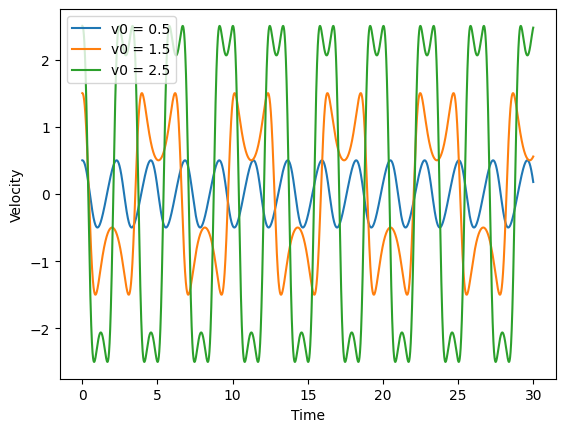

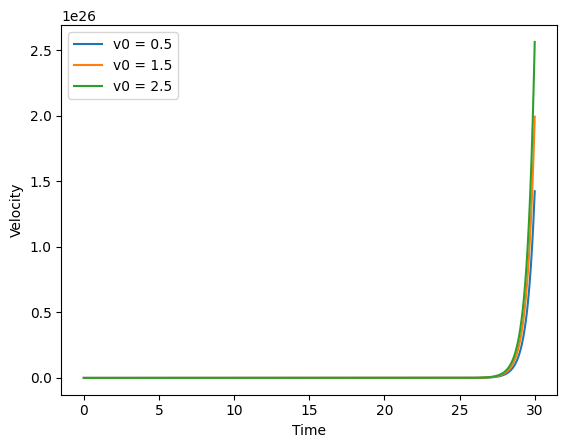

In [10]:
ti = 0
tf = 30
dt = 0.001

m = 1
V_0 = 1
#d = 0.1 #d = 0.1 is difficult to understand. I must've made a unit error or something.
# Here's with d=1 #
d = 1

x_0 = d

v_0list = [0.5,1.5,2.5]

times = np.arange(ti,tf,dt)



def a(x):
    return V_0 / (m*d**4) * (4*x*d**2-4*x**3)


for j in v_0list:

    x = [x_0]
    v = [j]

    for i in range(len(times)-1):
        xnew, vnew = time_step_vv(x[i],v[i],a,dt)
        x.append(xnew)
        v.append(vnew)

    plt.plot(times,v,label=f'v0 = {j}')
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

### Now without x^4. Looking at our integral from part 5 this knocks out the 4x^3 term in a(x). doing some copy-paste we have ###


def a(x):
    return V_0 / (m*d**4) * (4*x*d**2)

for j in v_0list:

    x = [x_0]
    v = [j]

    for i in range(len(times)-1):
        xnew, vnew = time_step_vv(x[i],v[i],a,dt)
        x.append(xnew)
        v.append(vnew)

    plt.plot(times,v,label=f'v0 = {j}')
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.legend()
plt.show()



<div style="background-color:PaleGreen;color:black;padding:2%;">

Without the x^4 term there is a constant positve increasing force which accelerates the particle, otherwise the x^4 term dominates and causes the particles to be trapped in the well (slowing down and turning around)


9. (10pt) Describe the behavior of the particle for the three initial conditions  and sketch the motion in an energy diagram. Is energy conserved in your simulations?

<div style="background-color:PaleGreen;color:black;padding:2%;">


Notice that for $v_0 = 0.5, KE = 1/2 * .25 = .125 < 1$ while for $v_0 = 1.5, KE = 1/2 * 1.5^2 = 1.125 > 1$, resulting in the double-humping as the particle passes the unstable equilibrium point

With x^4 term:

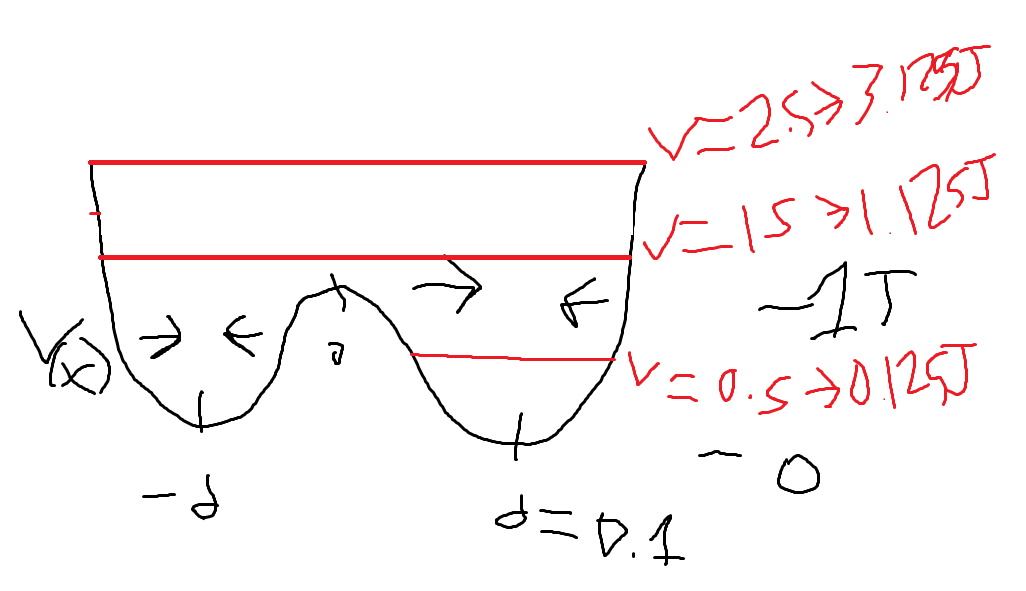

Withoud x^4 term:

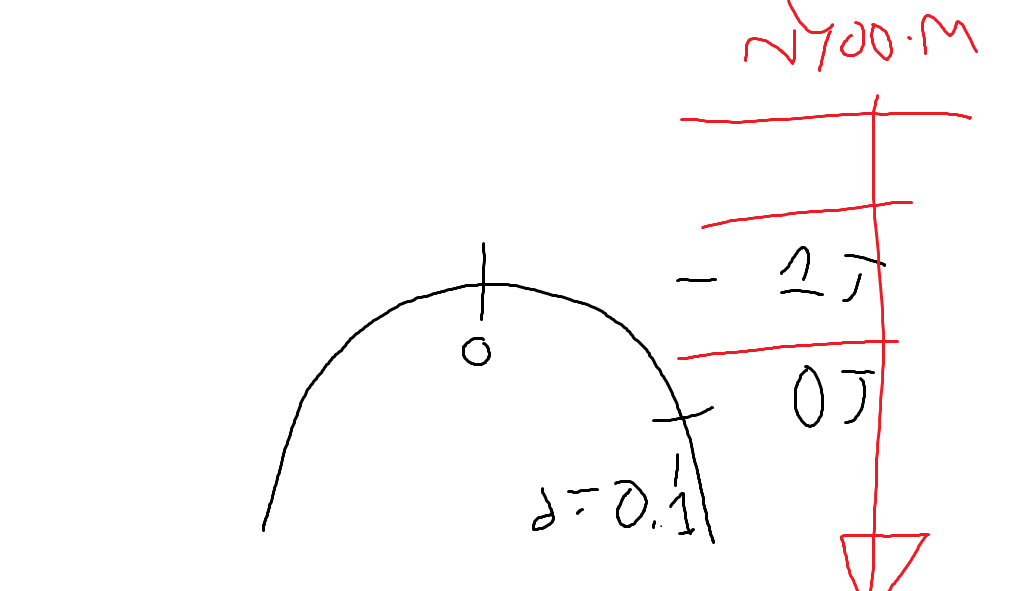



### Part 2, a model of quark confinement

In part 2, we are going to study a new potential. This potential contains the basic mathematical components needed to describe the confinement of quarks through a term $\kappa x$. The aim of this exercise is to try to develop your intuition about the motion of physical objects due to specific forces. Then we will test our intuition by running simulations. The potential, in one dimension only is defined for $x\in [0.2,\infty)$.  It reads:

$$
V(x) = -\frac{\gamma}{x}+\frac{\delta}{x^2}+\kappa x,
$$

where the last term is the one which ensures confinement of for example quarks.

1. (5pt) Plot the potential for $x\in [0.2,10]$ and set $\gamma=10$, $\delta = 3$ and $\kappa =1$. Find the value of $x$ where the potential has a minimum.



In part 2, we are going to study a new potential. This potential contains the basic mathematical components needed to describe the confinement of quarks through a term $\kappa x$. The aim of this exercise is to try to develop your intuition about the motion of physical objects due to specific forces. Then we will test our intuition by running simulations. The potential, in one dimension only is defined for $x\in [0.2,\infty)$.  It reads:

$$
V(x) = -\frac{\gamma}{x}+\frac{\delta}{x^2}+\kappa x,
$$

where the last term is the one which ensures confinement of for example quarks.

1. (5pt) Plot the potential for $x\in [0.2,10]$ and set $\gamma=10$, $\delta = 3$ and $\kappa =1$. Find the value of $x$ where the potential has a minimum.


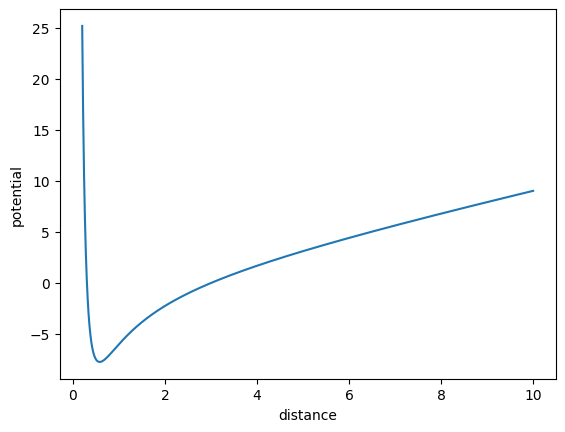

-7.741893562664473


0.5731462925851704

In [5]:
def quarkpot(x,gamma,delta,kappa):
    return -gamma/x + delta/(x**2)+kappa*x

x = np.linspace(0.2,10,500)
y = quarkpot(x,10,3,1)

plt.plot(x,y)
plt.xlabel('distance')
plt.ylabel('potential')
plt.show()
print(min(y))

x[np.argmin(y)]

<div style="background-color:PaleGreen;color:black;padding:2%;">


Looks to be about $x = 0.57,\ y = -7.74 \approx -\sqrt{60}$

More analytically we get $\dot V = \frac{\gamma}{x^2} - \frac{2\delta}{x^3} + \kappa = 0 $
$$
\frac{10x-6}{x^3}+1=0 \\ x = ...
$$
Well that's not pretty. It comes out to around $.58$ which is pretty close to what I got


2. (5pt) Show that this potential leads to an energy conserving force by calculating the **curl** of the resulting force.

<div style="background-color:PaleGreen;color:black;padding:2%;">
As previously, curl is pretty simple in a 1D problem. Since curl is zero, energy is clearly conserved
</div>

3. (10pt) Assume now that at $x=2$ the particle moving in this potential is at rest, that is its velocity is zero. Find the total energy and describe what kind of motion you can expect. The point $x=2$ is a so-called turning point. Can you find the other turning point where the kinetic energy is zero. If you keep increasing $x$, will the particle ever be able to escape the potential well?



In [6]:
quarkpot(2,10,3,1)

-2.25

<div style="background-color:PaleGreen;color:black;padding:2%;">

Total energy is just potential since kinetic is zero, we just need to find the other point where potential is -2.25. Via wolfram we have

$$
-2.25 = - \frac{10}{x} + \frac{3}{x^2} + x \\
x \approx 0.328
$$

This is the other turning point, as potential is the same, which results in zero kinetic energy. Since the potential well goes to infinity at $x=0$ and $x=\infty$, the particle can never escape the well


In [7]:
quarkpot(0.3276,10,3,1)

-2.244105868409165



4. (20pt) Finally we will now change our program (using either the Euler-Cromer or the Velocity-Verlet method) and compute the position and the velocity as functions of time using the force computed from the above potential. Use as initial condition at time $t=0$ that the particle is $x_0=2$ and has initial velocity $v_0=0$. Test numerically that energy is conserved as function of time. 

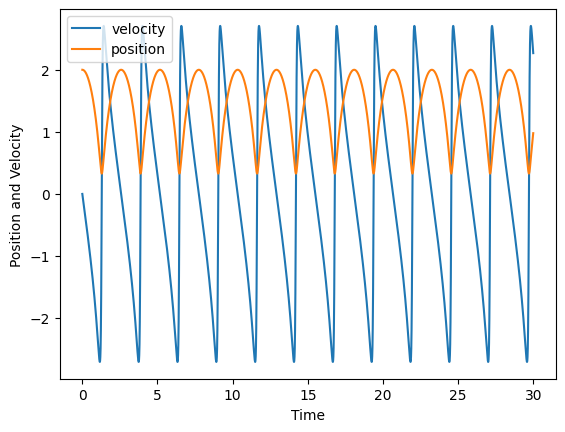

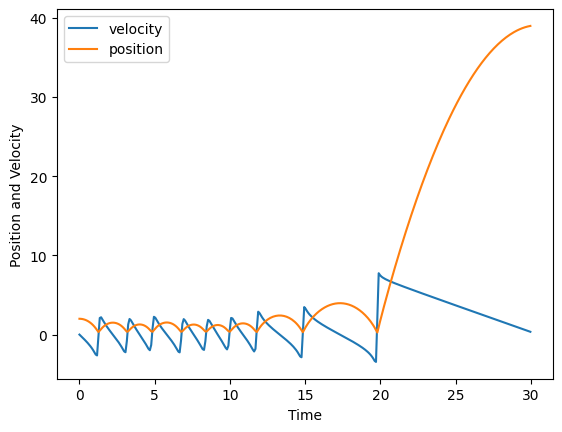

In [31]:
ti = 0
tf = 30
dt = 0.001

times = np.arange(ti,tf,dt)

m = 1.5
gamma = 10
delta = 3
kappa = 1

def a(x): # a = F/m = -dVdx / m
    return -1 / m * (gamma / (x**2) - 2 * delta / (x**3) + kappa)

x0 = 2
v0 = 0

x = [x0]
v = [v0]

for i in range(len(times)-1):
    xnew, vnew = time_step_vv(x[i],v[i],a,dt)
    x.append(xnew)
    v.append(vnew)

plt.plot(times,v, label='velocity')
plt.plot(times,x, label='position')
plt.ylabel('Position and Velocity')
plt.xlabel('Time')
plt.legend()
plt.show() 

#yep, looks to be saving energy. What about a longer time step?

dt = 0.09
times = np.arange(ti,tf,dt)
x = [x0]
v = [v0]

for i in range(len(times)-1):
    xnew, vnew = time_step_vv(x[i],v[i],a,dt)
    x.append(xnew)
    v.append(vnew)

plt.plot(times,v, label='velocity')
plt.plot(times,x, label='position')
plt.ylabel('Position and Velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

